In [13]:
import tensorflow as tf
import os
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[]

In [16]:
import cv2
import imghdr

In [17]:
data_dir = 'data2' 

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [19]:
image_exts[1]

'jpg'

In [20]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

00000000000000223534.jpg
00apple-trademarks-logos5-mobileMasterAt3x.jpg
1024x1024.jpg
106587904-15928703582020-06-22t173405z_90636234_rc2heh9e4av9_rtrmadp_0_apple-developers.jpeg
106941688-1631644205737-AppleEventSEP14KeynoteTim_Cook02.jpg
1200x630wa.png
2048.jpeg
20Ounce_NYAS-Apples2.png
220614-maryland-apple-logo-store-2020-ac-458p-b6ae71.jpg
3y3v9tyf8h96.png
432f8d95e331bb0cd867ba278e24216a.png
5HTJMJWHHII6ZDH7GOYFT5GBW4.jpg
6000200094514.jpg
ada-22-poster_2x.jpg
apple--600.png
apple-500x500.jpg
apple-black-logo-wallpaper.jpg
Apple-car-wheel-icon-feature-blue.jpg
apple-developer-og.png
apple-gala.png
apple-gift-card-trimmed_2x.jpg
Apple-Green.jpeg
apple-mcIntosh.png
applecare-plus-homepage_2x.png
apples-at-farmers-market-royalty-free-image-1627321463.jpg
apple_158989157.jpg
Apple_Logo_Reuters_NEW1.jpg
apple_logo_unsplash_sumudu-mohottige-bIgpii04UIg-unsplash.jpg
apple_march_2022_event_confirmed-4.jpg
apple_shocks.png
b602d252e83436246c69e0fee2fb252c.w3000.h600.jpg
business_plaintext

In [21]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [22]:
import numpy as np
from matplotlib import pyplot as plt

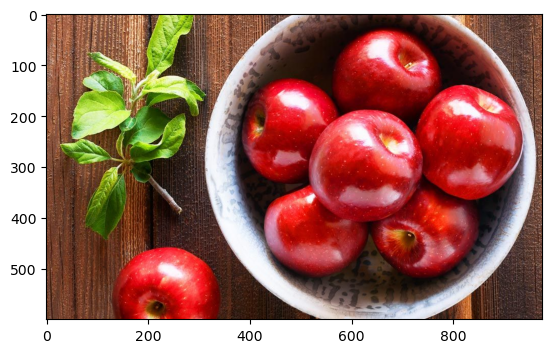

In [23]:
img = cv2.imread(os.path.join('data2','apple','_109228504_apples1.jpg' ))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [24]:
data = tf.keras.utils.image_dataset_from_directory('data2')

Found 149 files belonging to 2 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [26]:
# Get another batch from the iterator
batch = data_iterator.next()

In [27]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [28]:

batch[1]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

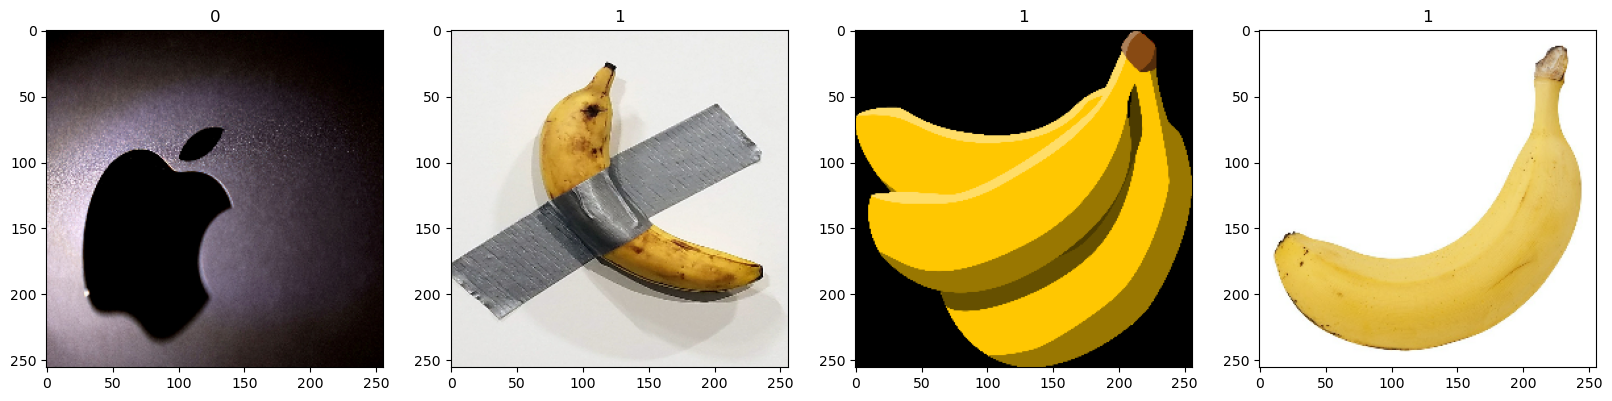

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [30]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [32]:
batch = scaled_iterator.next()

In [33]:
batch[0].max()

1.0

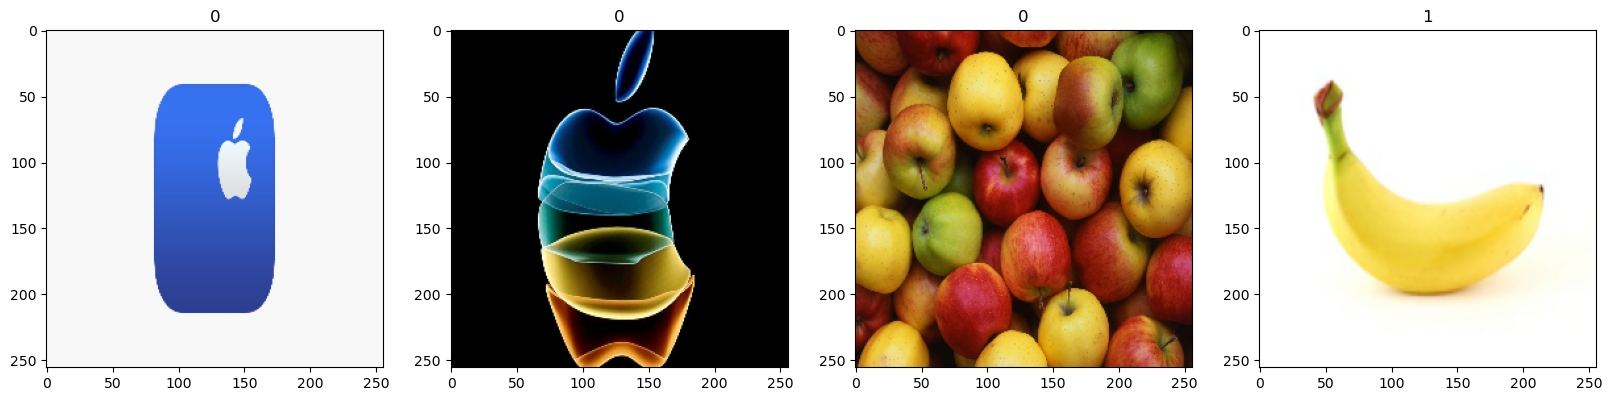

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [35]:
data.as_numpy_iterator().next()

(array([[[[9.77083325e-01, 8.99264693e-01, 1.44730389e-01],
          [9.75000024e-01, 8.97181392e-01, 1.42647058e-01],
          [9.73295808e-01, 8.95477176e-01, 1.33712471e-01],
          ...,
          [9.69106138e-01, 8.97660077e-01, 8.57843144e-04],
          [9.78634357e-01, 8.96281421e-01, 0.00000000e+00],
          [9.79875147e-01, 8.97522211e-01, 0.00000000e+00]],
 
         [[9.76796091e-01, 8.98364723e-01, 1.37335330e-01],
          [9.76470590e-01, 9.00122523e-01, 1.32843137e-01],
          [9.76068497e-01, 9.00524676e-01, 1.32843137e-01],
          ...,
          [9.78220761e-01, 8.98441315e-01, 0.00000000e+00],
          [9.79415596e-01, 8.97062659e-01, 0.00000000e+00],
          [9.78634357e-01, 8.96281421e-01, 0.00000000e+00]],
 
         [[9.68872547e-01, 8.94362748e-01, 1.45343140e-01],
          [9.70308661e-01, 8.95798862e-01, 1.46779254e-01],
          [9.71691191e-01, 8.97181392e-01, 1.48161769e-01],
          ...,
          [9.80392158e-01, 8.98039222e-01, 0.0000

In [36]:
#Splitting the data

len(data)

5

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+2
test_size = int(len(data)*.1)+1

In [38]:
test_size + val_size+train_size

7

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [40]:
#Building neural network

train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
#model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 32)      4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 250, 250, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 250000)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               64000256  
                                                      

Training


In [46]:
#Training

logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 13s 4s/step - loss: 10.4390 - accuracy: 0.3646 - val_loss: 0.9024 - val_accuracy: 0.6604
Epoch 2/20
3/3 [==============================] - 11s 4s/step - loss: 0.9227 - accuracy: 0.6979 - val_loss: 0.4426 - val_accuracy: 0.8302
Epoch 3/20
3/3 [==============================] - 10s 3s/step - loss: 0.5880 - accuracy: 0.6875 - val_loss: 0.3392 - val_accuracy: 0.9057
Epoch 4/20
3/3 [==============================] - 10s 3s/step - loss: 0.2583 - accuracy: 0.8958 - val_loss: 0.2385 - val_accuracy: 0.9245
Epoch 5/20
3/3 [==============================] - 9s 3s/step - loss: 0.2014 - accuracy: 0.9375 - val_loss: 0.1372 - val_accuracy: 0.9623
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.1613 - accuracy: 0.9583 - val_loss: 0.1101 - val_accuracy: 0.9623
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 0.1423 - accuracy: 0.9479 - val_loss: 0.2177 - val_accuracy: 0.8679
Epoch 8/20
3/3 [==================

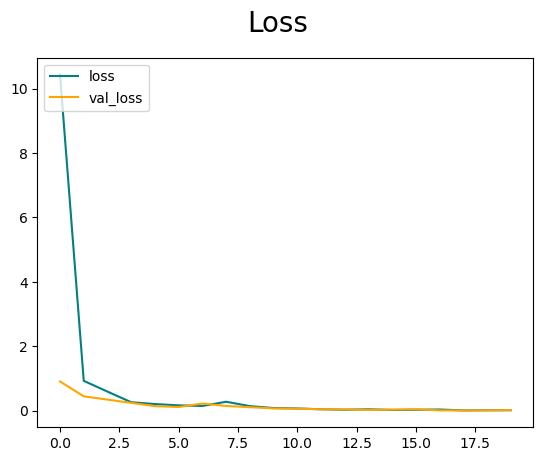

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

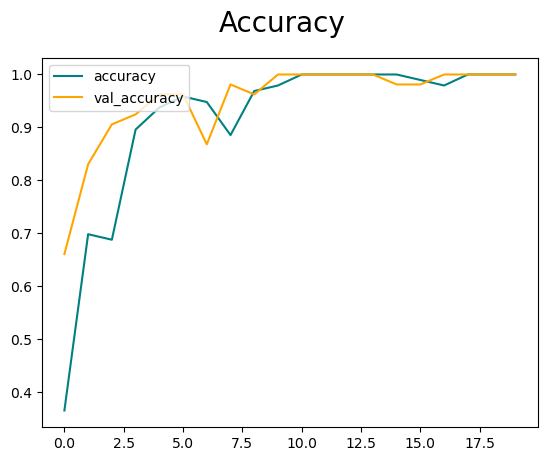

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [54]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [55]:
import cv2

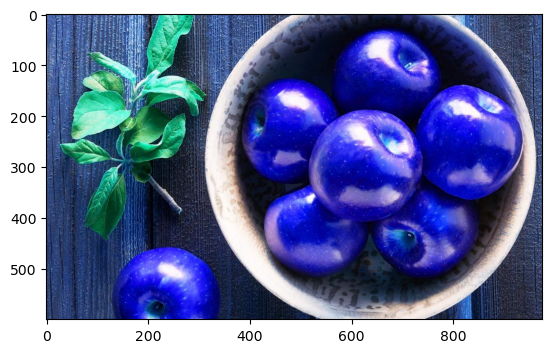

In [56]:
#img = cv2.imread('Sad1.jpg')
#img = cv2.imread(os.path.join('data3','humans','human01-00.png' ))
img = cv2.imread(os.path.join('data2','apple','_109228504_apples1.jpg' ))
#img = cv2.imread(os.path.join('data2','banana','Sad1.jpg' ))
plt.imshow(img)

plt.show()

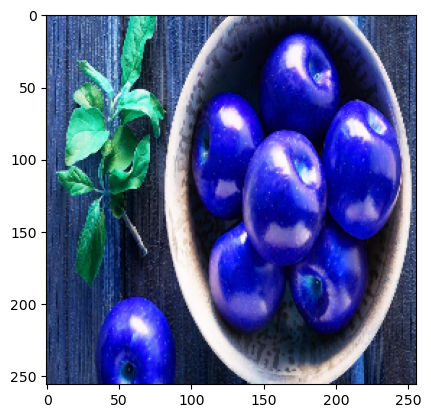

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 332ms/step


In [59]:
yhat

array([[7.2043174e-14]], dtype=float32)

In [60]:
if yhat > 0.5: 
    print(f'Predicted class is a human')
else:
    print(f'Predicted class is a horse')

Predicted class is a horse


In [61]:
from tensorflow.keras.models import load_model


In [62]:
#model.save(os.path.join('models','AoB40epochs.h4'))

In [63]:
os.path.join('models', 'AoB20epochs.h4')

'models\\AoB20epochs.h4'

In [64]:
new_model = load_model(os.path.join('models', 'AoB20epochs.h4'))

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


array([[4.7208567e-05]], dtype=float32)

In [66]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [67]:
img = cv2.imread(os.path.join('data3','humans','horse01-0.png' ))

In [68]:
if yhatnew > 0.5: 
    print(f'Predicted class is a human')
else:
    print(f'Predicted class is a horse')

Predicted class is a horse
